In [41]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos para que se muestren en el notebook
%matplotlib inline
sns.set(style='whitegrid')

In [42]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('myIOTDynamoDB_dev2_data.csv')

# Ordenar los datos por la columna 'time'
df = df.sort_values(by='time')

In [43]:
# Mostrar las primeras filas del DataFrame para una vista inicial
print("Vista inicial de los datos:")
df.head()

Vista inicial de los datos:


,hostname,download_speed,number_of_hosts,cpu_usage,cpu_temp,disk_total,memory_used,upload_speed,memory_total,time,disk_used
0,raspberrypi,14.645,5,1.0,42.394,14.292,163.027,7.867,871.664,1729612730,11.396
1,raspberrypi,15.862,7,1.0,44.008,14.292,164.785,7.132,871.664,1729613086,11.396
2,raspberrypi,12.713,4,0.8,41.856,14.292,159.352,4.586,871.664,1729613557,11.397
3,raspberrypi,13.125,6,0.3,42.932,14.292,161.934,8.158,871.664,1729613683,11.397
4,raspberrypi,5.585,5,0.2,44.008,14.292,163.301,5.583,871.664,1729613821,11.397


In [44]:
# Resumen general del DataFrame (para ver tipos de datos, valores nulos, etc.)
print("\nResumen del DataFrame:")
df.info()


Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hostname         133 non-null    object 
 1   download_speed   133 non-null    float64
 2   number_of_hosts  133 non-null    int64  
 3   cpu_usage        133 non-null    float64
 4   cpu_temp         133 non-null    float64
 5   disk_total       133 non-null    float64
 6   memory_used      133 non-null    float64
 7   upload_speed     133 non-null    float64
 8   memory_total     133 non-null    float64
 9   time             133 non-null    int64  
 10  disk_used        133 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 11.6+ KB


In [45]:
# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
df.describe()


Descripción estadística de las columnas numéricas:


,download_speed,number_of_hosts,cpu_usage,cpu_temp,disk_total,memory_used,upload_speed,memory_total,time,disk_used
count,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,1.330000e+02,1.330000e+02,133.000000
mean,18.593158,4.541353,0.524060,51.256842,1.429200e+01,168.875113,10.705759,8.716640e+02,1.729666e+09,11.412677
std,15.372249,2.072589,0.386152,3.556735,1.783073e-15,3.098045,7.614620,1.141167e-13,4.632020e+04,0.008766
min,0.000000,1.000000,0.000000,36.476000,1.429200e+01,158.777000,0.000000,8.716640e+02,1.729613e+09,11.396000
25%,6.284000,3.000000,0.300000,49.388000,1.429200e+01,167.461000,4.942000,8.716640e+02,1.729625e+09,11.405000
50%,11.018000,4.000000,0.500000,51.540000,1.429200e+01,169.617000,7.818000,8.716640e+02,1.729643e+09,11.413000
75%,37.851000,7.000000,0.800000,54.230000,1.429200e+01,171.148000,16.731000,8.716640e+02,1.729721e+09,11.420000
max,43.217000,9.000000,1.700000,56.382000,1.429200e+01,174.039000,31.329000,8.716640e+02,1.729735e+09,11.428000


In [46]:
# Verificar si hay valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
hostname           0
download_speed     0
number_of_hosts    0
cpu_usage          0
cpu_temp           0
disk_total         0
memory_used        0
upload_speed       0
memory_total       0
time               0
disk_used          0
dtype: int64


In [47]:
#Rellenar valores nulos con la media
# df['nombre_columna'] = df['nombre_columna'].fillna(df['nombre_columna'].mean())

In [48]:
# Verificar si hay duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0


In [49]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)

In [50]:
# Normalizar los nombres de las columnas (eliminar espacios, poner en minúsculas, etc.)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [51]:
# Verificar la consistencia de valores en una columna 'hostname'
print("\nValores únicos en la columna 'hostname':")
print(df['hostname'].unique())


Valores únicos en la columna 'hostname':
['raspberrypi']


In [52]:
# Filtrar valores inconsistentes o atípicos en una columna numérica 
# Filtrar por rango de valores lógicos (ejemplo: 'cpu_usage' entre 0 y 100)
df = df[(df['cpu_usage'] >= 0) & (df['cpu_usage'] <= 100)]

In [53]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv('myIOTDynamoDB_dev2_data_clean.csv', index=False)
print("\nDatos limpios guardados en 'myIOTDynamoDB_dev2_data_clean.csv'")



Datos limpios guardados en 'myIOTDynamoDB_dev2_data_clean.csv'


In [54]:
# Mostrar algunas filas del DataFrame limpio
print("\nVista de los datos después de la limpieza:")
df.head()


Vista de los datos después de la limpieza:


,hostname,download_speed,number_of_hosts,cpu_usage,cpu_temp,disk_total,memory_used,upload_speed,memory_total,time,disk_used
0,raspberrypi,14.645,5,1.0,42.394,14.292,163.027,7.867,871.664,1729612730,11.396
1,raspberrypi,15.862,7,1.0,44.008,14.292,164.785,7.132,871.664,1729613086,11.396
2,raspberrypi,12.713,4,0.8,41.856,14.292,159.352,4.586,871.664,1729613557,11.397
3,raspberrypi,13.125,6,0.3,42.932,14.292,161.934,8.158,871.664,1729613683,11.397
4,raspberrypi,5.585,5,0.2,44.008,14.292,163.301,5.583,871.664,1729613821,11.397


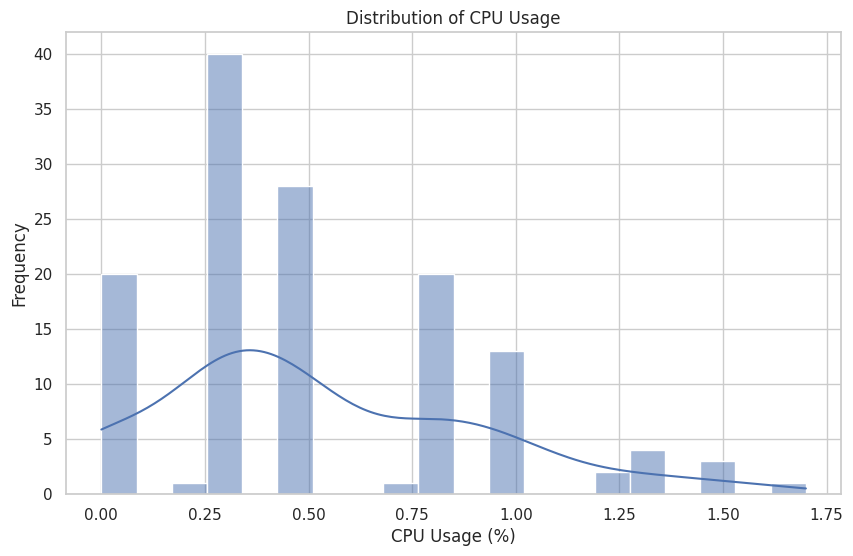

In [55]:
# Distribution plot for a numerical column (e.g., 'cpu_usage')
plt.figure(figsize=(10, 6))
sns.histplot(df['cpu_usage'], bins=20, kde=True)
plt.title('Distribution of CPU Usage')
plt.xlabel('CPU Usage (%)')
plt.ylabel('Frequency')
plt.show()


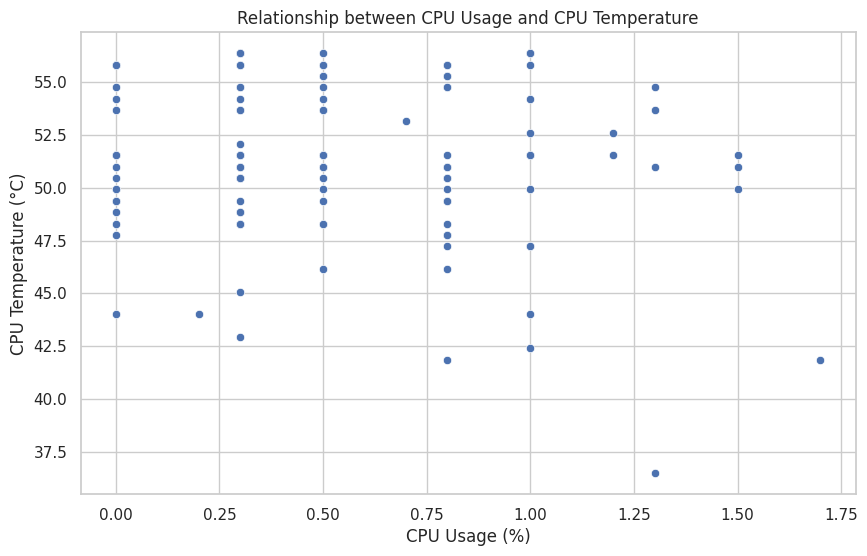

In [56]:
# Scatter plot to analyze the relationship between two variables (e.g., 'cpu_usage' and 'cpu_temp')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cpu_usage', y='cpu_temp')
plt.title('Relationship between CPU Usage and CPU Temperature')
plt.xlabel('CPU Usage (%)')
plt.ylabel('CPU Temperature (°C)')
plt.show()


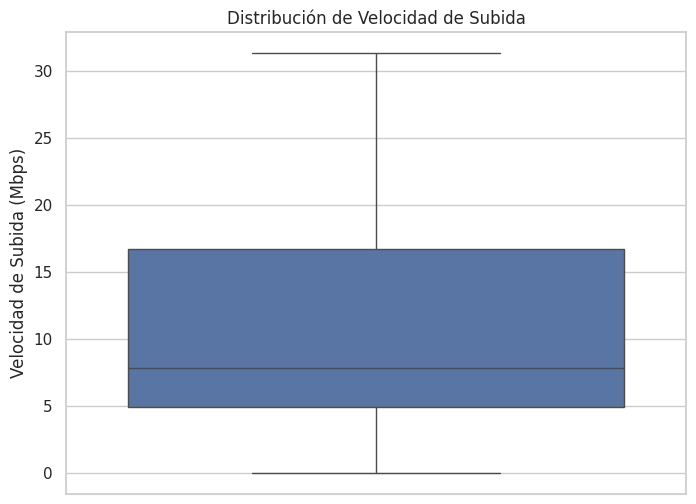

In [57]:
# Gráfico de caja (boxplot) para identificar outliers en una columna (por ejemplo, 'upload_speed')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='upload_speed')
plt.title('Distribución de Velocidad de Subida')
plt.ylabel('Velocidad de Subida (Mbps)')
plt.show()

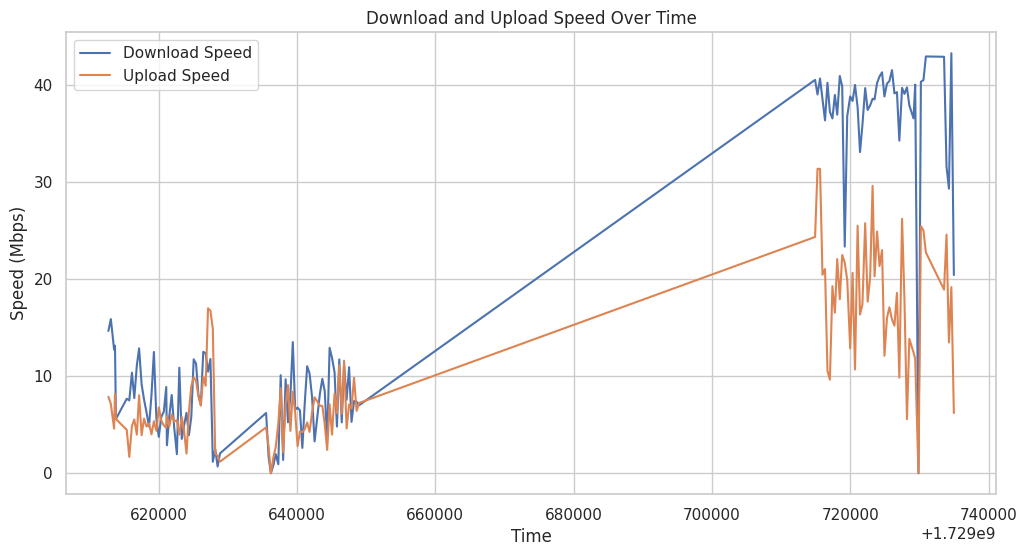

In [58]:
# Line plot to compare multiple metrics over time (e.g., 'download_speed' and 'upload_speed')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='time', y='download_speed', label='Download Speed')
sns.lineplot(data=df, x='time', y='upload_speed', label='Upload Speed')
plt.title('Download and Upload Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed (Mbps)')
plt.legend()
plt.show()

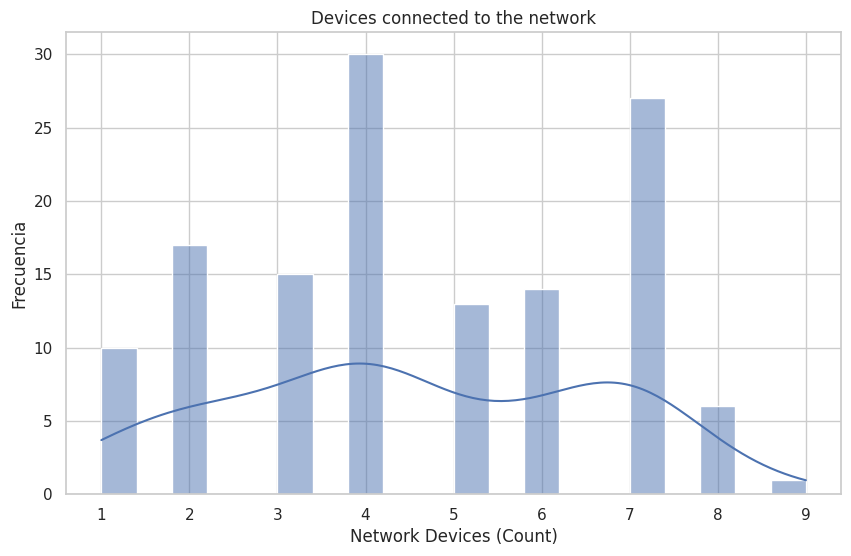

In [37]:
# Gráfico de distribución para una columna numérica (por ejemplo, 'cpu_usage')
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_hosts'], bins=20, kde=True)
plt.title('Devices connected to the network')
plt.xlabel('Network Devices (Count)')
plt.ylabel('Frecuencia')
plt.show()

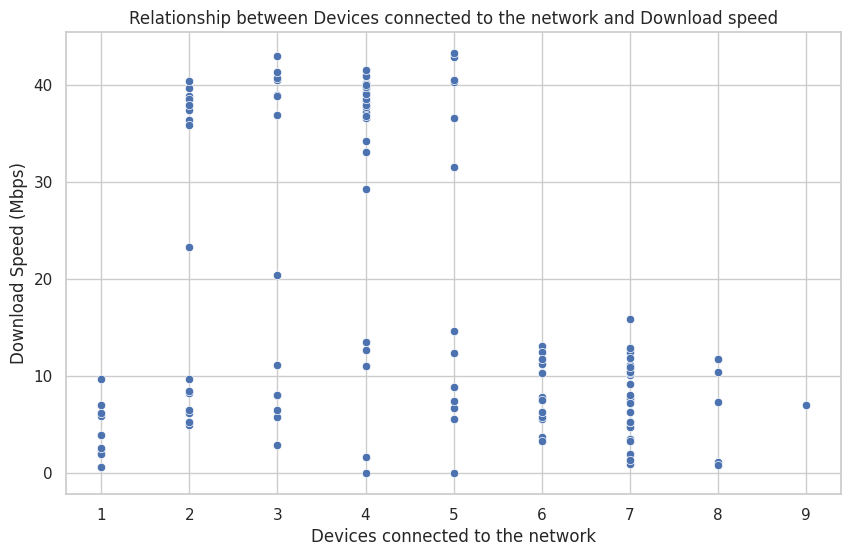

In [62]:
# Scatter plot to analyze the relationship between two variables (e.g., 'cpu_usage' and 'cpu_temp')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_hosts', y='download_speed')
plt.title('Relationship between Devices connected to the network and Download speed')
plt.xlabel('Devices connected to the network')
plt.ylabel('Download Speed (Mbps)')
plt.show()

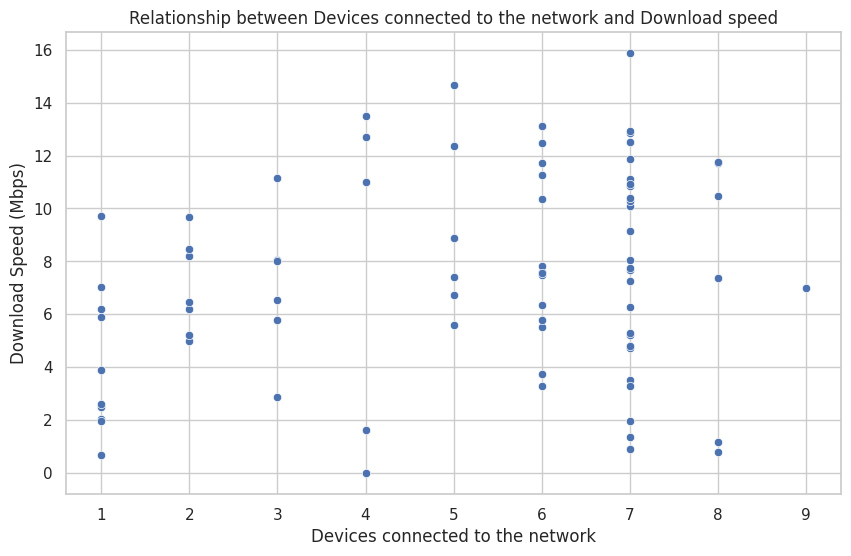

In [67]:
# Filtrar los datos para que solo incluyan registros donde 'time' > 700000
filtered_df = df[df['time'] < 1729714920]

# Crear el gráfico usando los datos filtrados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='number_of_hosts', y='download_speed')
plt.title('Relationship between Devices connected to the network and Download speed')
plt.xlabel('Devices connected to the network')
plt.ylabel('Download Speed (Mbps)')
plt.show()

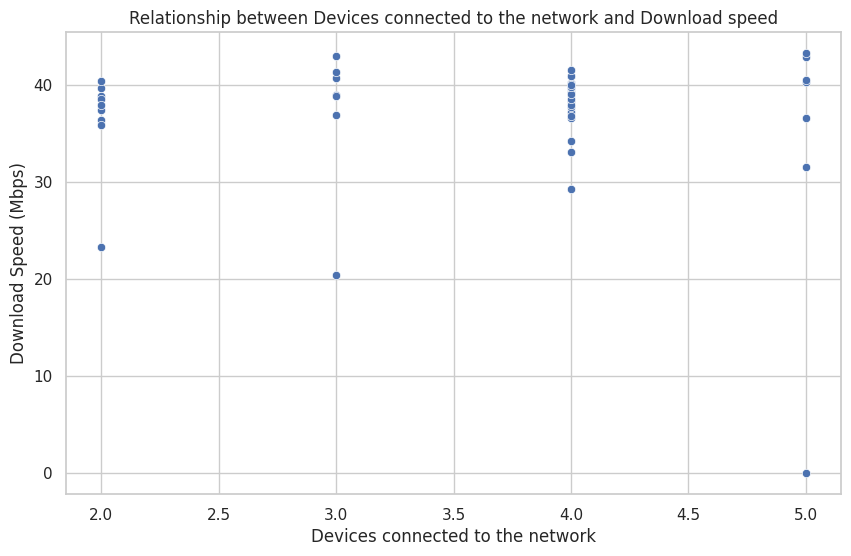

In [66]:
# Filtrar los datos para que solo incluyan registros donde 'time' > 700000
filtered_df = df[df['time'] > 1729714920]

# Crear el gráfico usando los datos filtrados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='number_of_hosts', y='download_speed')
plt.title('Relationship between Devices connected to the network and Download speed')
plt.xlabel('Devices connected to the network')
plt.ylabel('Download Speed (Mbps)')
plt.show()
